In [1]:
# Libraries
import numpy as np
import mne
from mne_connectivity import spectral_connectivity_time
from mne_connectivity import spectral_connectivity_epochs
import scipy.io
from scipy.signal import butter, lfilter
from matplotlib import pyplot as plt
from IPython.display import clear_output
import math

In [2]:
def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter(order, cutoff, fs=fs, btype='low', analog=False)
    y = lfilter(b, a, data)
    return y

In [3]:
# Generate some data
n_epochs = 1
n_channels = 2
n_times = 800
sfreq = 100
t = np.arange(n_times) / sfreq

data_option = 1
np.random.seed(2)
data = np.random.rand(n_epochs, n_channels, n_times)

for i in range(n_epochs):
    for c in range(n_channels):
        wave_freqs = np.linspace(2,40,5)
        # Introduce random phase for each channel
        phase = np.random.rand(1)*2*np.pi
        x = np.zeros(n_times)
        for fSine in wave_freqs:
            # Introduce random component to amplitude
            amp = butter_lowpass_filter(np.random.rand(n_times)*2-1,sfreq/5,sfreq)
            # Generate group of sines
            x += np.sin(2*np.pi*fSine*t+phase/(4*fSine)) + amp
        data[i,c] = x/len(wave_freqs)

# Create epochs object for compatibility
ch_names = ["T1","T2"] # random names
info = mne.create_info(ch_names, sfreq, ch_types="eeg")
data_epoch = mne.EpochsArray(data,info)


# print(data_epoch.get_data().shape)
data_epoch.plot(scalings=5)

scipy.io.savemat('simulated_eeg.mat', {'eeg_data': data_epoch.get_data()})
print(data_epoch.get_data().shape)
print(wave_freqs)

Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Using qt as 2D backend.
Using pyopengl with version 3.1.7
(1, 2, 800)
[ 2.  11.5 21.  30.5 40. ]


Dropped 0 epochs: 
The following epochs were marked as bad and are dropped:
[]
Channels marked as bad:
none


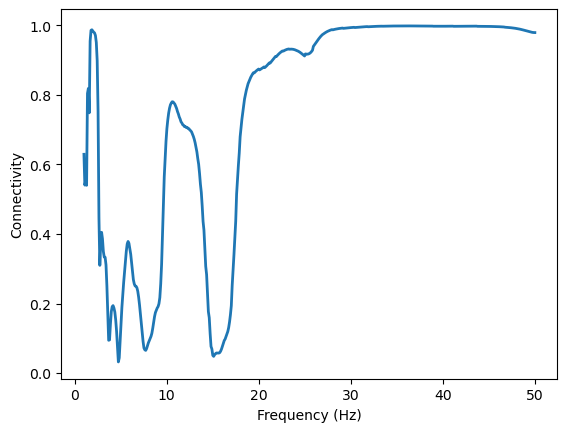

In [4]:
fmin = 1 
fmax = 50
freqs = np.linspace(fmin,fmax, num =512)
con_time = spectral_connectivity_time(data_epoch, 
                                      method="coh",
                                      mode = 'multitaper',
                                      mt_bandwidth = 3,
                                      average = True,
                                      sfreq=sfreq,
                                      indices = (np.array([0]),
                                                 np.array([1])),
                                      fmin = fmin, 
                                      fmax = fmax, 
                                    #   n_cycles=2/freqs,
                                      #n_cycles=.5,
                                      freqs=freqs)

print(con_time.get_data())
clear_output(wait=False)
# con_time = con_time.get_data()
# # Avg over time
# con_time = np.mean(con_time,axis=-1)
# Avg over epochs
# con_time = np.mean(con_time,axis=0)
# con_time.shape
# Create epochs object for compatibility

# print(con_time.get_data().shape)
# # print(dir(con_time))
# print(con_time.names)
plt.plot(con_time.freqs, np.squeeze(con_time.get_data()[0]), linewidth=2)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Connectivity")
plt.show()

In [106]:
fmin = 1 
fmax = 50
freqs = np.linspace(fmin,fmax, num =512)
mtBandwidths = np.ceil(freqs/5)
coherencyVals = np.random.rand(len(freqs),1)
for fIndex in range(0, len(freqs)):
    con_time = spectral_connectivity_time(data_epoch, 
                                            method="coh",
                                            mode = 'multitaper',
                                            mt_bandwidth = mtBandwidths[fIndex],
                                            average = True,
                                            sfreq=sfreq,
                                            indices = (np.array([0]),
                                                        np.array([1])),
                                            fmin = fmin, 
                                            fmax = fmax, 
                                            #   n_cycles=2/freqs,
                                            #n_cycles=.5,
                                            freqs=freqs[fIndex])
    # print(fIndex)
    # print(freqs[fIndex])
    # # # print(con_time.get_data()[0])
    # a = con_time.get_data()[0]
    # print(a)
    coherencyVals[fIndex] = con_time.get_data()[0]
clear_output(wait=False)

plt.plot(freqs, np.squeeze(coherencyVals), linewidth=2)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Connectivity")
plt.show()
# print(coherencyVals)

Connectivity computation...
   Processing epoch 1 / 1 ...


C:\Users\alire\AppData\Local\Temp\ipykernel_25152\2778822516.py:7: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 7.99 s (baseline off), ~19 KiB, data loaded,
 '1': 1>, so metadata was not modified.
  con_time = spectral_connectivity_time(data_epoch,


ValueError: time_bandwidth should be >= 2.0 for good tapers

Connectivity computation...
   Processing epoch 1 / 1 ...


/var/folders/4p/wvr1dn0j59d5sdhhr_8b001c0000gn/T/ipykernel_19604/241755931.py:5: RuntimeWarning: There were no Annotations stored in <EpochsArray | 1 events (all good), 0 – 7.99 s (baseline off), ~19 kB, data loaded,
 '1': 1>, so metadata was not modified.
  con_time = spectral_connectivity_time(data_epoch,


[Connectivity computation done]
(1, 512)


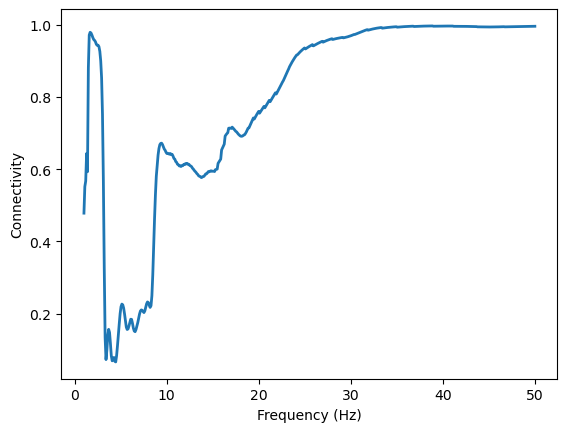

In [5]:
fmin = 1 
fmax = 50
freqs = np.linspace(fmin,fmax, num =512)
# print(data_epoch.get_data().shape)
con_time = spectral_connectivity_time(data_epoch, 
                                      method="coh",
                                      mode = 'multitaper',
                                      mt_bandwidth = 5,
                                      padding = 0,
                                      average = True,
                                      sfreq=sfreq,
                                      indices = (np.array([0]),
                                                 np.array([1])),
                                      fmin = fmin, 
                                      fmax = fmax, 
                                      # n_cycles=4/freqs,
                                      freqs=freqs)

print(con_time.get_data().shape)
# clear_output(wait=False)

plt.plot(con_time.freqs, np.squeeze(con_time.get_data()[0]), linewidth=2)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Connectivity")
plt.show()

In [ ]:
conn_lowfreq = spectral_connectivity_time(data = data.crop(tmin = 0, tmax = 0.5), method = 'coh', mode = 'multitaper',
                                        mt_bandwidth = 3, average = True, freqs = np.linspace(1,3, num =250),  # 1024 samples bc Joe’s code’s padding forces us to upsample
                                        fmin = 1, fmax = 3, faverage = False, n_cycles=0.05,
                                        verbose = False, n_jobs = -1)